In [1]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,classification_report
import numpy as np
import os
import cv2
from google.colab import files, drive
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-14 18:30:26.319306: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 18:30:26.322810: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-14 18:30:26.403247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-14 18:30:26.405040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 18:30:28.096978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


In [ ]:
def load_dataset():
    if os.path.exists('/content/brain-tumor-mri-dataset'):
        return

    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes.'.format(name=fn, length=len(uploaded[fn])))

    !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
    !mkdir brain-tumor-mri-dataset
    !unzip brain-tumor-mri-dataset.zip -d ./brain-tumor-mri-dataset
    clear_output()

load_dataset()

In [ ]:
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode= "categorical",
    color_mode='grayscale'
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode= "categorical",
    color_mode='grayscale'
    )

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(256, 256, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))

model.compile(
    optimizer=SGD(learning_rate=0.001), #SGD optiziser
    loss='categorical_crossentropy',
    metrics= ['accuracy'])

# model.compile(
#     optimizer=Adam(learning_rate = 0.001), #Adam optimizer
#     loss='categorical_crossentropy',
#     metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      3200      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     401536    
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 128)     512       
 chNormalization)                                                
                                                        

In [ ]:
model_es = EarlyStopping(
    monitor = 'loss',
    min_delta = 1e-11,
    patience = 12,
    verbose = 1
    )

model_rlr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 6,
    verbose = 1
    )

model_mcp = ModelCheckpoint(
    filepath = 'CNN_model_weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only = True,
    verbose = 1
    )

history = model.fit(
    train_generator,
    steps_per_epoch=5712//32,
    epochs=20,
    validation_data=test_generator,
    validation_steps= 1311//32,
    callbacks=[model_es, model_rlr, model_mcp]
    )


Epoch 1/20
178/178 [==============================] - ETA: 0s - loss: 0.7099 - accuracy: 0.7386
Epoch 1: val_accuracy improved from -inf to 0.28281, saving model to CNN_model_weights.h5
178/178 [==============================] - 99s 444ms/step - loss: 0.7099 - accuracy: 0.7386 - val_loss: 1.4699 - val_accuracy: 0.2828 - lr: 0.0010
Epoch 2/20
178/178 [==============================] - ETA: 0s - loss: 0.4367 - accuracy: 0.8315
Epoch 2: val_accuracy improved from 0.28281 to 0.36172, saving model to CNN_model_weights.h5
178/178 [==============================] - 74s 414ms/step - loss: 0.4367 - accuracy: 0.8315 - val_loss: 1.7529 - val_accuracy: 0.3617 - lr: 0.0010
Epoch 3/20
178/178 [==============================] - ETA: 0s - loss: 0.3183 - accuracy: 0.8761
Epoch 3: val_accuracy improved from 0.36172 to 0.75000, saving model to CNN_model_weights.h5
178/178 [==============================] - 76s 424ms/step - loss: 0.3183 - accuracy: 0.8761 - val_loss: 0.6194 - val_accuracy: 0.7500 - lr: 0.

In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples//32)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

40/40 [==============================] - 3s 74ms/step - loss: 0.0679 - accuracy: 0.9812
Test Loss: 0.06789
Test Accuracy: 0.98125


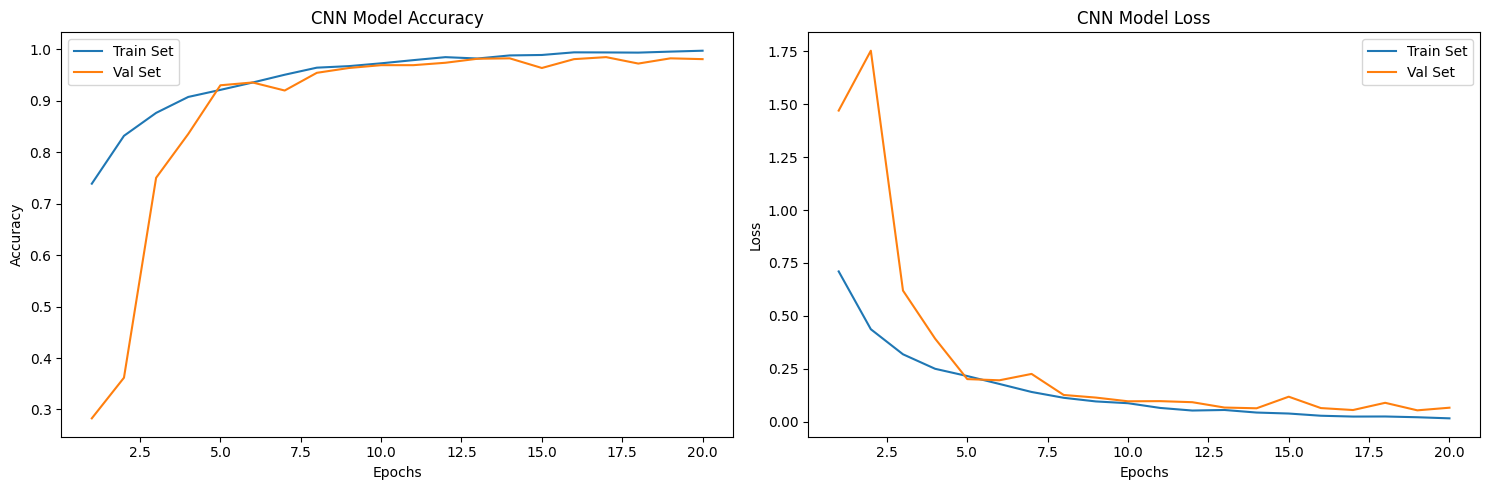

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
all_pred = []
all_true = []

# Assuming `test` is an image generator or a dataset generator
# Iterate through the generator to process all images
for i in range(41):  # Replace `total_iterations` with the actual number of iterations needed
    X_test, y_test = next(test_generator)
    pred = model.predict(X_test)

    pred = np.argmax(pred, axis=1)
    y_test_new = np.argmax(y_test, axis=1)

    # Append predictions and true labels to the respective lists
    all_pred.extend(pred)
    all_true.extend(y_test_new)

# Calculate the classification report using all predictions and true labels
clear_output()
print(classification_report(all_true, all_pred, target_names=categories))

              precision    recall  f1-score   support

      glioma       1.00      0.94      0.97       300
  meningioma       0.95      0.98      0.96       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.98      1.00      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



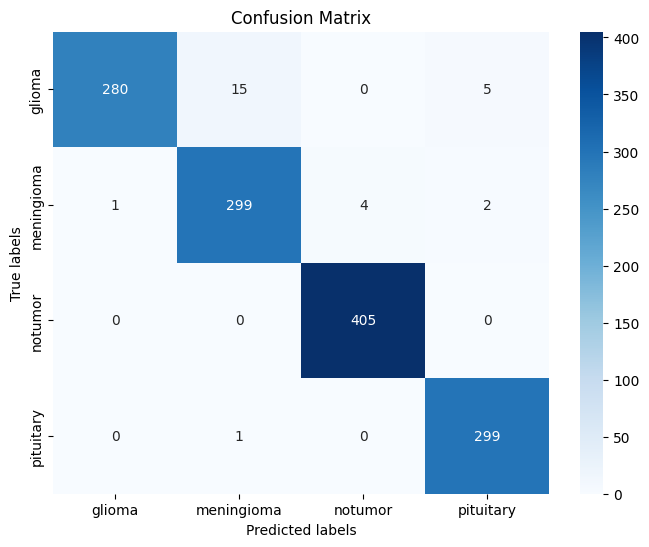

In [ ]:
conf_matrix = confusion_matrix(all_true, all_pred)
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
